[View in Colaboratory](https://colab.research.google.com/github/tcglarry/alibaba_manufacturing_competition/blob/master/ali_xgb_densenet121_testing.ipynb)

In [1]:
"""For Alibaba Competition

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/10DYDNSM_eaFtn7lrM0CyUIXRFdIDtabS
"""

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse






Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


In [3]:

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [4]:

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

aoi_aoi_test1.ipynb  Sample upload.txt
aoi_test	     TAHU PowerPoint Template.pdf
Colab Notebooks      TAHU PowerPoint Template - 柱狀圖 1.ods
kaggle		     tai_future_data
mobilenet_ssd	     test for excel
PiXNet		     Untitled0.ipynb


In [5]:
!ls drive/kaggle/ali/manu_big_data

guangdong_defect_instruction_20180916.xlsx
guangdong_round1_submit_sample_20180916.csv
guangdong_round1_test_a_20180916.zip
guangdong_round1_train1_20180903.zip
guangdong_round1_train2_20180916.zip
test.csv
train_sample_total.zip


In [0]:
!cp drive/kaggle/ali/manu_big_data/guangdong_round1_test_a_20180916.zip .

In [7]:
!ls

adc.json  drive  guangdong_round1_test_a_20180916.zip  sample_data


In [8]:

!unzip guangdong_round1_test_a_20180916.zip


Archive:  guangdong_round1_test_a_20180916.zip
   creating: guangdong_round1_test_a_20180916/
  inflating: guangdong_round1_test_a_20180916/0.jpg  
 extracting: guangdong_round1_test_a_20180916/1.jpg  
  inflating: guangdong_round1_test_a_20180916/10.jpg  
 extracting: guangdong_round1_test_a_20180916/100.jpg  
  inflating: guangdong_round1_test_a_20180916/101.jpg  
  inflating: guangdong_round1_test_a_20180916/102.jpg  
  inflating: guangdong_round1_test_a_20180916/103.jpg  
  inflating: guangdong_round1_test_a_20180916/104.jpg  
  inflating: guangdong_round1_test_a_20180916/105.jpg  
  inflating: guangdong_round1_test_a_20180916/106.jpg  
  inflating: guangdong_round1_test_a_20180916/107.jpg  
  inflating: guangdong_round1_test_a_20180916/108.jpg  
  inflating: guangdong_round1_test_a_20180916/109.jpg  
  inflating: guangdong_round1_test_a_20180916/11.jpg  
 extracting: guangdong_round1_test_a_20180916/110.jpg  
 extracting: guangdong_round1_test_a_20180916/111.jpg  
 extracting: gua

In [0]:
!rm -rf guangdong_round1_test_a_20180916.zip

In [10]:
!ls

adc.json  drive  guangdong_round1_test_a_20180916  sample_data


In [0]:
!rm -rf sample_data

In [12]:
!cp drive/kaggle/ali/manu_big_data/label_to_category.pkl .

cp: cannot stat 'drive/kaggle/ali/manu_big_data/label_to_category.pkl': No such file or directory


In [0]:
 !cp drive/kaggle/ali/xgb_densenet_correct_0917.pkl .

In [0]:
!cp drive/kaggle/ali/manu_big_data/test.csv .

In [15]:
!ls

adc.json  guangdong_round1_test_a_20180916  test.csv
drive	  label_to_category.pkl		    xgb_densenet_correct_0917.pkl


In [16]:


import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import subprocess
import os
import pickle
import sklearn 

from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier




import keras.backend as K

from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.applications.mobilenet import MobileNet
#from keras.applications.mobilenetv2 import MobileNetV2
#from keras.applications.nasnet import NASNetMobile,NASNetLarge
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img



from keras.applications.xception import Xception, preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback


from keras import regularizers
#from dummyPy import OneHotEncoder
from keras.utils import to_categorical


import time

Using TensorFlow backend.


In [0]:
src= 'guangdong_round1_test_a_20180916/'
src_save = 'drive/kaggle/ali/'

In [0]:
file_list = os.listdir(src)

In [19]:
len(file_list)


440

In [0]:
def last_4chars(x):
    #print (x[:-4])
    return(float(x[:-4]))

file_list = sorted(file_list, key = last_4chars)   

In [25]:

file_list

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg'

In [0]:
pick = np.random.randint(len(file_list))

In [29]:
img0 = plt.imread(src+file_list[pick])
img0.shape

(1920, 2560, 3)

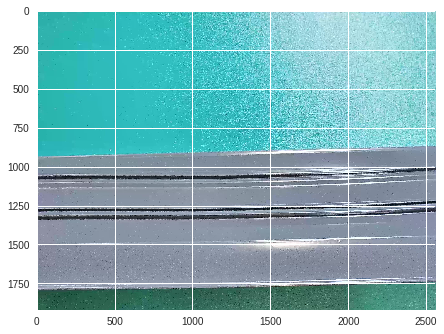

In [30]:
plt.imshow(img0)

In [31]:

# .DS_store contains in the file list
if '.DS_Store' in file_list:
    del file_list[file_list.index('.DS_Store')]
  
len (file_list)

440

In [32]:


with open('label_to_category.pkl', 'rb') as handle:
    label_to_category = pickle.load(handle)
label_to_category.keys() 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [0]:

with open('xgb_densenet_correct_0917.pkl', 'rb') as handle:
    xgb1 = pickle.load(handle)
 


In [0]:
# build model , using pre-trained Xception, include top = True
def build_model():
    inputs = Input(shape=(1920,2560,3))
    #inputs = Input(shape=(224,224,3))
    #inputs = Lambda(lambda x: x/275. - 1.0)(inputs)
    # create the base pre-trained model
    #base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    base_model = MobileNet(weights='imagenet',input_tensor=inputs,  include_top=True)
    
    x = base_model.output
    print (x.get_shape)
    model = Model(inputs=base_model.input, outputs=x)
    model.summary()
    
    return model

In [35]:
model_1 = build_model()
# compile the model (should be done *after* setting layers to non-trainable)
model_1.compile(optimizer='Nadam', loss='categorical_crossentropy',metrics=['accuracy'])

17227776/17225924 [==============================] - 9s 1us/step
<bound method Tensor.get_shape of <tf.Tensor 'reshape_2/Reshape:0' shape=(?, 1000) dtype=float32>>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1920, 2560, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 1922, 2562, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 960, 1280, 32)     864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 960, 1280, 32)     128       
_________________________________________________________________
conv1_relu (Activation)      (None, 960, 1280, 32)     0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 962, 128

In [0]:
def first_prediction(model,data):
    pred_temp = model.predict(data)
    return pred_temp


In [0]:
# assign batch inferefcing of pre-traianed model to be 4 

def make_batch (file_ist,batch_size):
  final_list =[]
  
 
  floor = int(np.floor(len(file_list)/batch_size))
  print ('floor=', floor)
  for i in range(floor+1):
      if i < floor:
          final_list.append(file_list[i*batch_size:(i+1)*batch_size])
      else: 
          final_list.append(file_list[i*batch_size:])
          
  # check final_llist len equal to file_list  
  a =0 
  for l in final_list:
    #print (len(l))
    #print (l[-10:])
    a += len(l)
  if (a - len(final_list) == 0):  
    print ('total size', a, 'final_list length equal to file_list')
  else:
    print ('total size', a, 'file_list', len(file_list),'final_list length NOT equal to file_list')
    print (a - len(file_list))
    print ('warning, something wrong')
    
  return final_list  




In [38]:
batch_size = 7
final_list = make_batch(file_list,batch_size)
print (len(final_list))

floor= 62
total size 440 file_list 440 final_list length NOT equal to file_list
0
warning, something wrong
63


In [39]:
s= time.time()
final_array = []
for j,l in enumerate(final_list):
      img_list=[]
      for i,img in enumerate(l):
          img = load_img(src+img)  
          x = img_to_array(img)
          x = preprocess_input(x)
          #print (x.shape)
          #x = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
          #x = x/127.5 -1.
          img_list.append(x)
      #print ('img_list=', len(img_list))
      testing_data = np.array(img_list)

      #print ('testing_data_shape', testing_data.shape)
      #train_data =  train_data[:,:,:,np.newaxis]
      #print (testing_data.shape)
      pred_temp = first_prediction(model_1,testing_data)

      print('batch = ', j, 'stage 1 completed', 'shape=', pred_temp.shape)
 
      e = time.time()
      print ('batch',j,'time=', round(e -s ,4))

      final_array.append(pred_temp)
      print ('afterbatch',j,'length=', len(final_array))

final_array = np.concatenate(final_array)
print ('final array', final_array.shape)
np.save(src_save+'test_data_densenet.npy',final_array)
print ('totally done, test data densent.npy')

batch =  0 stage 1 completed shape= (7, 1000)
batch 0 time= 7.3528
afterbatch 0 length= 1
batch =  1 stage 1 completed shape= (7, 1000)
batch 1 time= 11.5804
afterbatch 1 length= 2
batch =  2 stage 1 completed shape= (7, 1000)
batch 2 time= 15.6778
afterbatch 2 length= 3
batch =  3 stage 1 completed shape= (7, 1000)
batch 3 time= 19.6072
afterbatch 3 length= 4
batch =  4 stage 1 completed shape= (7, 1000)
batch 4 time= 23.5507
afterbatch 4 length= 5
batch =  5 stage 1 completed shape= (7, 1000)
batch 5 time= 27.5041
afterbatch 5 length= 6
batch =  6 stage 1 completed shape= (7, 1000)
batch 6 time= 31.427
afterbatch 6 length= 7
batch =  7 stage 1 completed shape= (7, 1000)
batch 7 time= 35.4374
afterbatch 7 length= 8
batch =  8 stage 1 completed shape= (7, 1000)
batch 8 time= 39.459
afterbatch 8 length= 9
batch =  9 stage 1 completed shape= (7, 1000)
batch 9 time= 43.4772
afterbatch 9 length= 10
batch =  10 stage 1 completed shape= (7, 1000)
batch 10 time= 47.414
afterbatch 10 length= 1

In [42]:
#final_array = np.concatenate(final_array)
final_array.shape

(440, 1000)

In [43]:
#make prediction

test_pred = xgb1.predict(final_array)

predictions = [round(value) for value in test_pred]

len(predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


440

In [0]:

with open (src_save+'xgb_densenet_test_prediction.pkl','wb') as handle:
  pickle.dump(predictions, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
test_df = pd.read_csv('test.csv')
test_df


,img,label
0,0.jpg,defect1
1,1.jpg,defect1
2,2.jpg,defect1
3,3.jpg,defect1
4,4.jpg,defect1
5,5.jpg,defect1
6,6.jpg,defect1
7,7.jpg,defect1
8,8.jpg,defect1
9,9.jpg,defect1


In [46]:
test_df['label'] = predictions
test_df['label'].replace(label_to_category,inplace=True)
test_df

,img,label
0,0.jpg,norm
1,1.jpg,norm
2,2.jpg,defect2
3,3.jpg,norm
4,4.jpg,defect10
5,5.jpg,norm
6,6.jpg,defect9
7,7.jpg,defect10
8,8.jpg,norm
9,9.jpg,defect3


In [47]:
test_df['label'].value_counts()

norm        158
defect5      68
defect10     58
defect11     27
defect4      25
defect2      25
defect6      18
defect7      15
defect1      14
defect3      12
defect8      10
defect9      10
Name: label, dtype: int64

In [0]:
test_df.to_csv(src_save+'test_submit_first.csv', header=False,index=False)